In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import tensorflow as tf
import keras

In [ ]:
(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

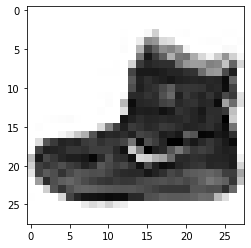

In [ ]:

plt.imshow(X_train[0], cmap = 'Greys' )

In [ ]:
class_labels = ["Tshirt", "Trousers", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

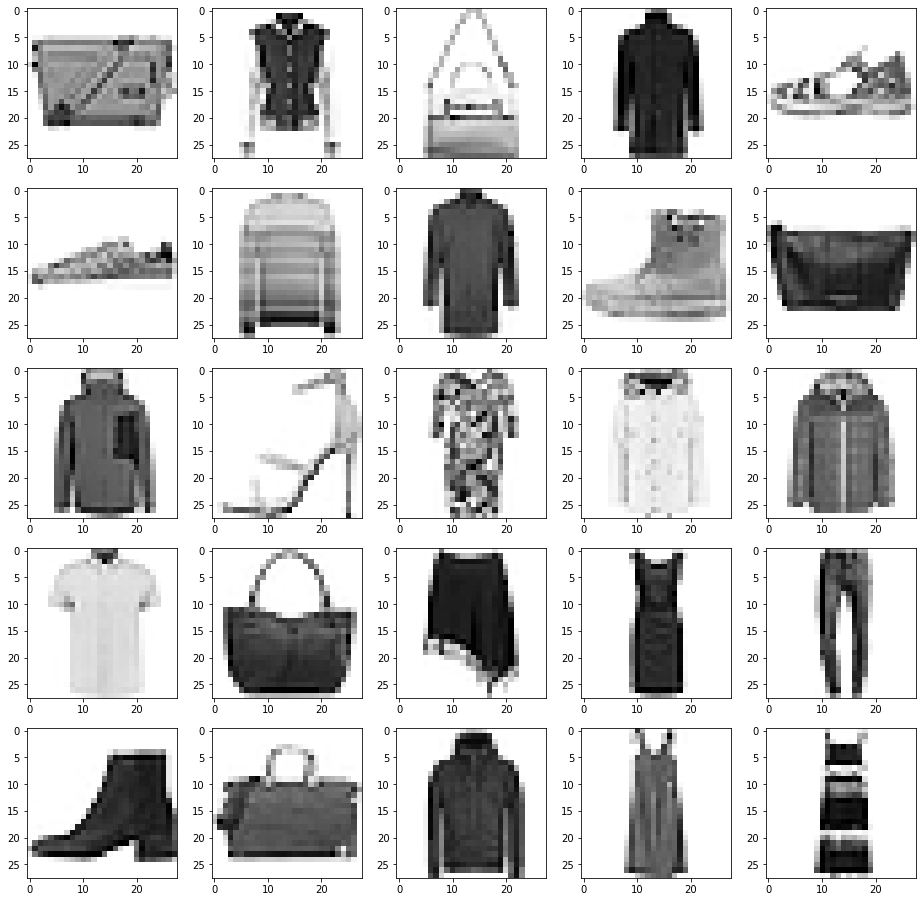

In [ ]:
plt.figure(figsize = (16,16))

j = 1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i],cmap = 'Greys')
  

Neural networks take 4d as input, not 3d.

In [ ]:
# expected conv2d_input to have 4 dimensions, 
#but got array with shape (28, 28, 1)
# so we have increase the dimention 3 to 4
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [ ]:
X_train.ndim

4

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)

In [ ]:
X_train.shape,  y_train.shape, X_validation.shape, y_validation.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

In [ ]:
#Building CNN model
cnn_model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])

In [ ]:
cnn_model.summary() # get the summary of model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
# complie the model
cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# train cnn model
cnn_model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/10
94/94 [==============================] - 13s 12ms/step - loss: 0.6222 - accuracy: 0.7883 - val_loss: 0.4263 - val_accuracy: 0.8561
Epoch 2/10
94/94 [==============================] - 1s 9ms/step - loss: 0.3789 - accuracy: 0.8684 - val_loss: 0.3678 - val_accuracy: 0.8738
Epoch 3/10
94/94 [==============================] - 1s 8ms/step - loss: 0.3342 - accuracy: 0.8823 - val_loss: 0.3441 - val_accuracy: 0.8809
Epoch 4/10
94/94 [==============================] - 1s 8ms/step - loss: 0.3067 - accuracy: 0.8909 - val_loss: 0.3308 - val_accuracy: 0.8817
Epoch 5/10
94/94 [==============================] - 1s 8ms/step - loss: 0.2854 - accuracy: 0.8986 - val_loss: 0.3038 - val_accuracy: 0.8933
Epoch 6/10
94/94 [==============================] - 1s 9ms/step - loss: 0.2676 - accuracy: 0.9043 - val_loss: 0.2905 - val_accuracy: 0.8994
Epoch 7/10
94/94 [==============================] - 1s 9ms/step - loss: 0.2504 - accuracy: 0.9116 - val_loss: 0.2834 - val_accuracy: 0.9027
Epoch 8/10
94/94 [

#Testing the model

In [ ]:
y_pred = cnn_model.predict(X_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.02, ..., 0.17, 0.03, 0.01]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2765 - accuracy: 0.8998


[0.2765187621116638, 0.8998000025749207]

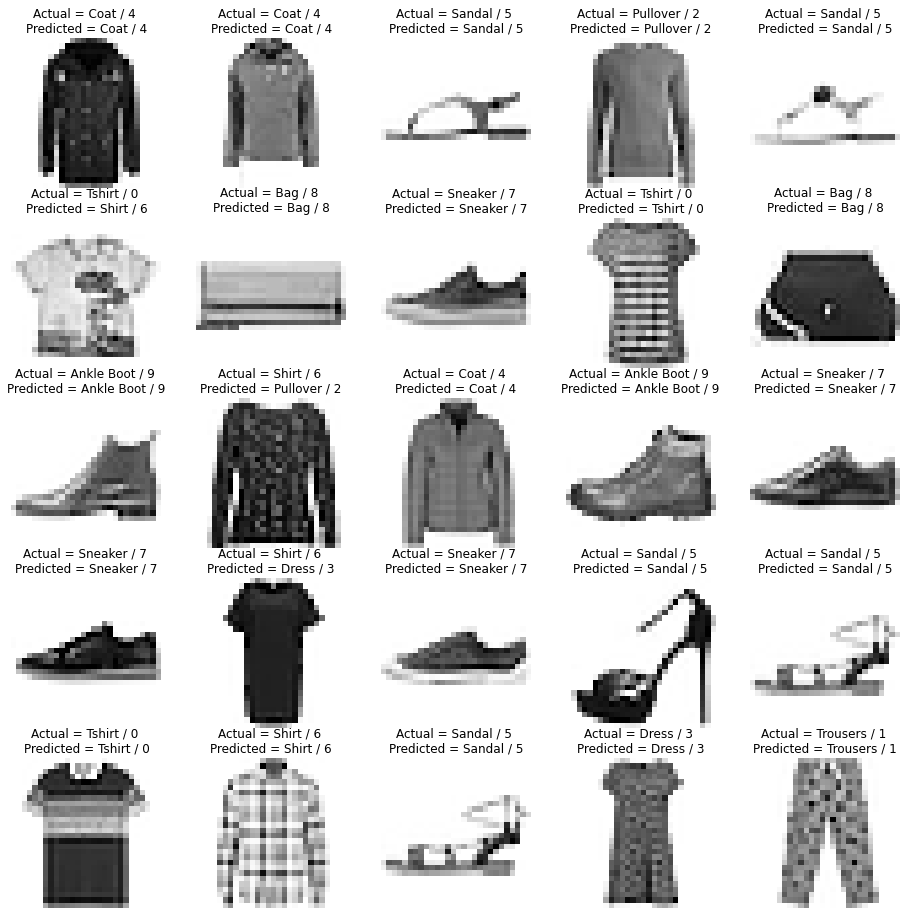

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off') 

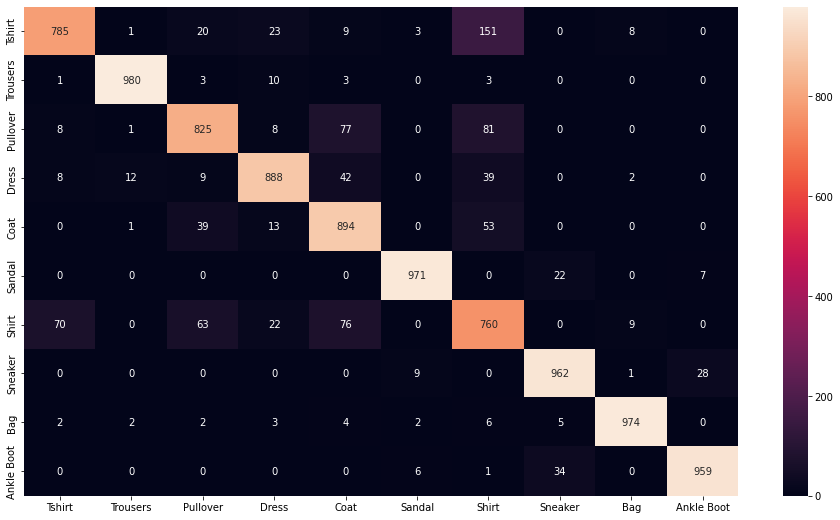

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

# show cm 
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

In [ ]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

      Tshirt       0.90      0.79      0.84      1000
    Trousers       0.98      0.98      0.98      1000
    Pullover       0.86      0.82      0.84      1000
       Dress       0.92      0.89      0.90      1000
        Coat       0.81      0.89      0.85      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.69      0.76      0.73      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle Boot       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

